In [9]:
import numpy as np
from wingrad.tensor import Tensor
from wingrad.net import MLP
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
# configure data
X, y = make_blobs(n_samples=300, random_state=76, n_features=2, centers=10)

# make y either -1 or 1
y = (y%2)*2 - 1

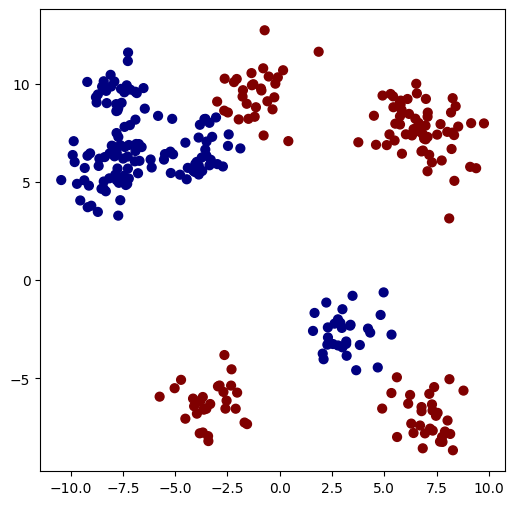

In [11]:
# visualize the data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='jet')
plt.show() 

In [13]:
# reshape data
X = X.T
y = y.reshape(300, 1).T

In [14]:
# training examples and labels
inputs = [X[:, i].reshape(2, 1) for i in range(X.shape[1])]
labels = [y[:, i].reshape(1, 1) for i in range(y.shape[1])] 

In [20]:
# initialize a model
model = MLP(2, [16, 16, 1])

In [21]:
# training loop
for k in range(300):

    epochs = 300

    # forward pass
    pred = [model(x) for x in inputs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(labels, pred)])
    accuracy = [(yi > 0) == (predi.data > 0) for yi, predi in zip(labels, pred)]
    acc = sum(accuracy) / len(accuracy)

    # zero out gradients before backward pass
    model.zero_grad()

    # backward pass
    loss.backward()

    # update parameters
    for p in model.parameters():
        p.data -= 0.0006 * p.grad

    # print the step, loss, and accuracy on that step 10 times througout training
    num_prints = 10 if epochs >= 10 else epochs
    if (k % (epochs // num_prints) == 0 or k == epochs-1):
        print(f"step {k}, loss: {loss.data[0][0]}, accuracy: {acc[0][0]*100}%")

step 0, loss: 237.24556153709165, accuracy: 74.33333333333333%
step 30, loss: 123.95018352059205, accuracy: 90.0%
step 60, loss: 100.93411268679694, accuracy: 90.66666666666666%
step 90, loss: 55.15818877784786, accuracy: 93.66666666666667%
step 120, loss: 31.031366829887382, accuracy: 97.0%
step 150, loss: 17.987558507674667, accuracy: 98.33333333333333%
step 180, loss: 11.680030390685834, accuracy: 99.0%
step 210, loss: 11.920274997872758, accuracy: 98.66666666666667%
step 240, loss: 11.289287589944044, accuracy: 99.0%
step 270, loss: 9.30191125750554, accuracy: 99.0%
step 299, loss: 9.353884664954393, accuracy: 99.33333333333333%


In [22]:
# Visualize the decision boundary
h = 0.03  # Step size for the meshgrid
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_mesh = np.c_[xx.ravel(), yy.ravel()]  # Flatten meshgrid coordinates
inputs = [Tensor(xrow).reshape((2, 1)) for xrow in X_mesh]
scores = [model(x).data > 0 for x in inputs]  # Predict scores for each point
Z = np.array(scores).reshape(xx.shape)

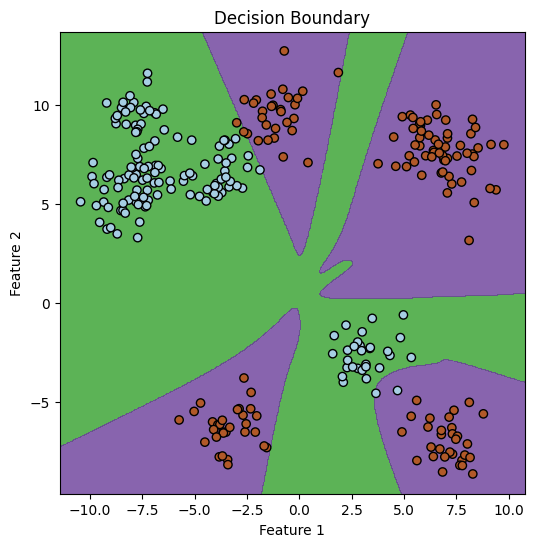

In [23]:
# Plot decision boundary and data points
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()